In [1]:
import numpy as np

import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/') 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import imp
import cat_utils
imp.reload(cat_utils)

import cPickle as pickle

In [2]:
jy_percentile_cuts = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80],[80,90],[90,100]]

In [3]:
w2_img_diff_flux_cuts_img_and_counts = [pickle.load(open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/w2'+\
                 '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.p','rb')) for j in range(len(jy_percentile_cuts))]
w2_img_diff_flux_cuts = [l[0] for l in w2_img_diff_flux_cuts_img_and_counts]
w2_img_diff_flux_cuts_counts = [l[1] for l in w2_img_diff_flux_cuts_img_and_counts]

secat_img_diff_flux_cuts_img_and_counts = [pickle.load(open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/secat'+\
                 '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.p','rb')) for j in range(len(jy_percentile_cuts))]
secat_img_diff_flux_cuts = [l[0] for l in secat_img_diff_flux_cuts_img_and_counts]
secat_img_diff_flux_cuts_counts = [l[1] for l in secat_img_diff_flux_cuts_img_and_counts]

mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts = [pickle.load(open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwacat_bounded_by_wise'+\
                 '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.p','rb')) for j in range(len(jy_percentile_cuts))]
mwa_img_bound_by_wise_diff_flux_cuts = [l[0] for l in mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts]
mwa_img_bound_by_wise_diff_flux_cuts_counts = [l[1] for l in mwa_img_bound_by_wise_diff_flux_cuts_img_and_counts]

mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts = [pickle.load(open('/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwacat_bounded_by_secatfov'+\
                 '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.p','rb')) for j in range(len(jy_percentile_cuts))]
mwa_img_bound_by_secatfov_diff_flux_cuts = [l[0] for l in mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts]
mwa_img_bound_by_secatfov_diff_flux_cuts_counts = [l[1] for l in mwa_img_bound_by_secatfov_diff_flux_cuts_img_and_counts]

In [4]:
w2_img_diff_flux_cuts[0].shape,(secat_img_diff_flux_cuts[0].shape)

((214, 214), (179, 179))

In [5]:
def sum_images_in_list_between_indices(imglist,i0,i1):
    return np.sum(np.array(imglist[i0:i1]),axis=0)

In [6]:
mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,8)
mwaimg -= mwaimg.mean()

wiseimg = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,8)
wiseimg  -= wiseimg.mean()

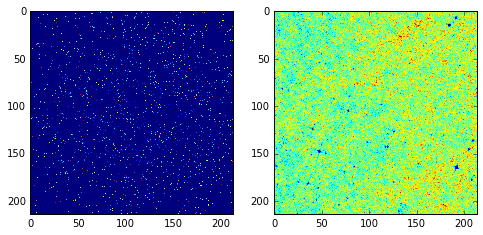

In [7]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(mwaimg,interpolation='nearest')
plt.subplot(122)
plt.imshow(wiseimg,interpolation='nearest')

In [8]:
c = np.mean(mwaimg*wiseimg)/(np.std(mwaimg)*np.std(wiseimg))
c_flip = np.mean(np.flipud(np.fliplr(mwaimg))*wiseimg)/(np.std(mwaimg)*np.std(wiseimg))

(c,c_flip)

(0.032884670227998368, -0.01364649577747923)

In [48]:
def flip(m):
    return np.flipud(m)

n = 10
c_grid_mwa_wise = np.zeros((n,n))
c_grid_mwa_secat = np.zeros((n,n))

c_grid_mwa_wise_flip = np.zeros((n,n))
c_grid_mwa_secat_flip = np.zeros((n,n))

for mwai in range(n):
    for iri in range(n):
        
        mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,mwai+1)
        mwaimg -= mwaimg.mean()
        irimg = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,iri+1)
        irimg  -= wiseimg.mean()
        
        c_grid_mwa_wise[mwai,iri] = np.mean(mwaimg*irimg)/(np.std(mwaimg)*np.std(irimg))
        c_grid_mwa_wise_flip[mwai,iri] = np.mean(flip(mwaimg)*irimg)/(np.std(mwaimg)*np.std(irimg))
        
        
        mwaimg = sum_images_in_list_between_indices(mwa_img_bound_by_secatfov_diff_flux_cuts,0,mwai+1)
        mwaimg -= mwaimg.mean()
        irimg = sum_images_in_list_between_indices(secat_img_diff_flux_cuts,0,iri+1)
        irimg  -= wiseimg.mean()
        
        c_grid_mwa_secat[mwai,iri] = np.mean(mwaimg*irimg)/(np.std(mwaimg)*np.std(irimg))
        c_grid_mwa_secat_flip[mwai,iri] = np.mean(flip(mwaimg)*irimg)/(np.std(mwaimg)*np.std(irimg))

In [75]:
c_grid_mwa_wise[5:,5:]

array([[ 0.02306303,  0.02430531,  0.02885623,  0.02909997, -0.00486735],
       [ 0.02112806,  0.0257419 ,  0.03146483,  0.03375616, -0.00573832],
       [ 0.0239725 ,  0.02627837,  0.03288467,  0.03269326, -0.00228278],
       [ 0.02263536,  0.02321965,  0.02962679,  0.03080072, -0.00356071],
       [ 0.01213421,  0.01487893,  0.01735178,  0.01609798, -0.00326762]])

In [83]:
np.max(c_grid_mwa_secat[:,:])

0.023557967711244403

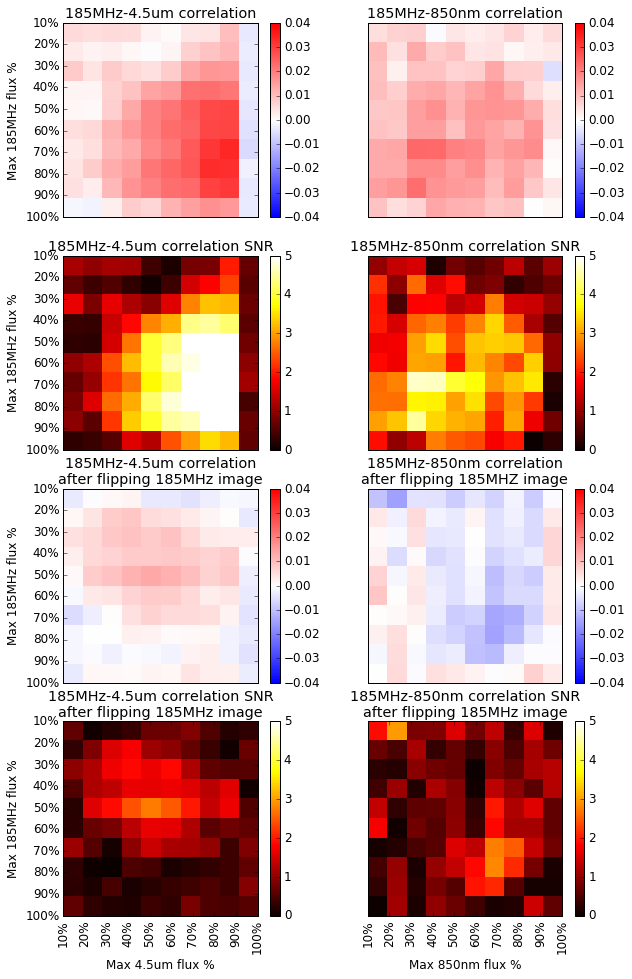

In [73]:
plt.figure(figsize=(10,16))
matplotlib.rcParams.update({'font.size': 12})
nrows,ncols = 4,2
cm = 'seismic'
v0,v1 = 0,.04

plt.subplot(nrows,ncols,1)
t = [10,20,30,40,50,60,70,80,90,100]
plt.imshow(c_grid_mwa_wise,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=[10,100,100,10])
plt.colorbar(ticks=[-.05,-.04,-.03,-.02,-.01,0,.01,.02,.03,.04,.05])
plt.gca().set_xticks([])
plt.gca().set_yticks(t)
plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.title('185MHz-4.5um correlation')
plt.ylabel('Max 185MHz flux %')

plt.subplot(nrows,ncols,2)
plt.imshow(c_grid_mwa_secat,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=[10,100,100,10])
plt.colorbar(ticks=[-.05,-.04,-.03,-.02,-.01,0,.01,.02,.03,.04,.05])
plt.xticks([])
plt.title('185MHz-850nm correlation')
plt.gca().set_yticks([])
# plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)

plt.subplot(nrows,ncols,3)
plt.imshow(np.abs(c_grid_mwa_wise)/(1./200),interpolation='nearest',vmin=0,vmax=5,cmap='hot',extent=[10,100,100,10])
plt.colorbar(ticks=[0,1,2,3,4,5])
plt.gca().set_xticks([])
#plt.gca().set_xticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.xticks(rotation=90)
plt.gca().set_yticks(t)
plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.title('185MHz-4.5um correlation SNR')
plt.ylabel('Max 185MHz flux %')

plt.subplot(nrows,ncols,4)
plt.imshow(np.abs(c_grid_mwa_secat)/(1./200),interpolation='nearest',vmin=0,vmax=5,cmap='hot',extent=[10,100,100,10])
plt.colorbar(ticks=[0,1,2,3,4,5])
plt.gca().set_xticks([])
# plt.gca().set_xticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.xticks(rotation=90)
plt.gca().set_yticks([])
# plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.title('185MHz-850nm correlation SNR')


plt.subplot(nrows,ncols,5)
plt.imshow(c_grid_mwa_wise_flip,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=[10,100,100,10])
plt.colorbar(ticks=[-.05,-.04,-.03,-.02,-.01,0,.01,.02,.03,.04,.05])
plt.gca().set_xticks([])
plt.gca().set_yticks(t)
plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.title('185MHz-4.5um correlation\nafter flipping 185MHz image')
plt.ylabel('Max 185MHz flux %')

plt.subplot(nrows,ncols,6)
plt.imshow(c_grid_mwa_secat_flip,interpolation='nearest',vmin=-.04,vmax=.04,cmap='bwr',extent=[10,100,100,10])
plt.colorbar(ticks=[-.05,-.04,-.03,-.02,-.01,0,.01,.02,.03,.04,.05])
plt.xticks([])
plt.title('185MHz-850nm correlation\nafter flipping 185MHZ image')
plt.gca().set_yticks([])
# plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)

plt.subplot(nrows,ncols,7)
plt.imshow(np.abs(c_grid_mwa_wise_flip)/(1./200),interpolation='nearest',vmin=0,vmax=5,cmap='hot',extent=[10,100,100,10])
plt.colorbar(ticks=[0,1,2,3,4,5])
t = [10,20,30,40,50,60,70,80,90,100]
plt.gca().set_xticks(t)
plt.gca().set_xticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.xticks(rotation=90)
plt.gca().set_yticks(t)
plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.title('185MHz-4.5um correlation SNR\nafter flipping 185MHz image')
plt.xlabel('Max 4.5um flux %')
plt.ylabel('Max 185MHz flux %')

plt.subplot(nrows,ncols,8)
plt.imshow(np.abs(c_grid_mwa_secat_flip)/(1./200),interpolation='nearest',vmin=0,vmax=5,cmap='hot',extent=[10,100,100,10])
plt.colorbar(ticks=[0,1,2,3,4,5])
plt.gca().set_xticks(t)
plt.gca().set_xticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.xticks(rotation=90)
plt.gca().set_yticks([])
# plt.gca().set_yticklabels([str(tt)+'%' for tt in t],fontsize=12)
plt.title('185MHz-850nm correlation SNR\nafter flipping 185MHz image')
plt.xlabel('Max 850nm flux %')

plt.savefig('source_correlation_grids_and_snrs.pdf',bbox_inches='tight')

In [50]:
c_grid_mwa_wise[9,9],c_grid_mwa_secat[9,9]

(-0.00326761602353192, 0.0013063711440090039)

In [62]:
c_grid_mwa_wise[8,8],c_grid_mwa_secat[8,8]

(0.030800718736659089, 0.0085742664628352359)

In [63]:
c_grid_mwa_wise_flip[8,8],c_grid_mwa_secat_flip[8,8]

(-0.0019290478990405036, -0.00054915016952075864)

In [59]:
1./200

0.005

/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10


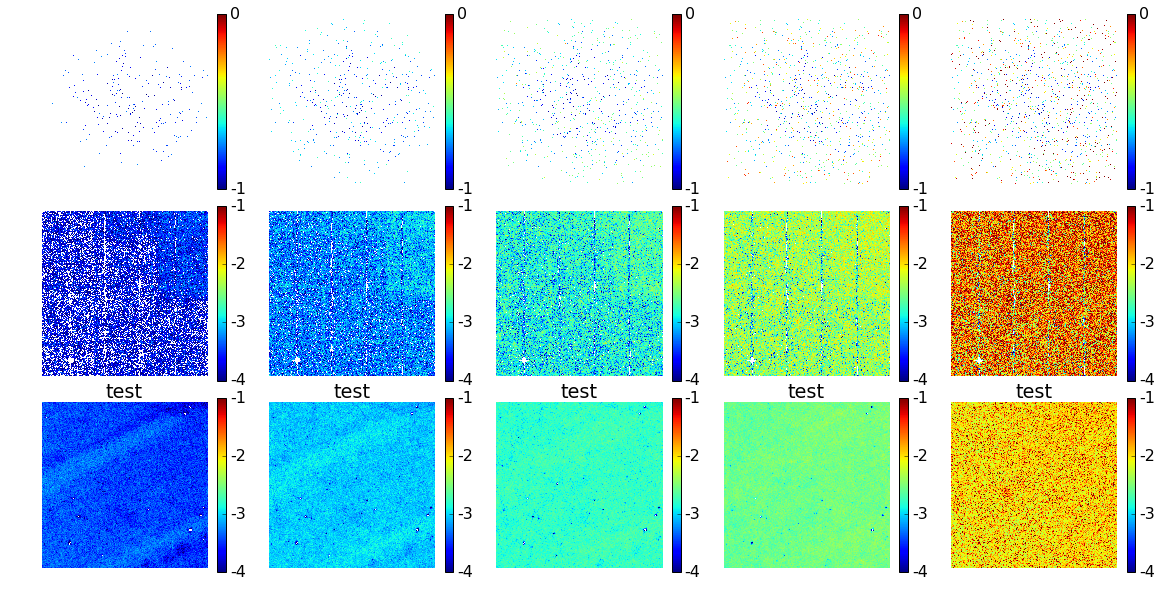

In [203]:
plt.figure(figsize=(20,10))
inds = [2,4,6,8,10]
for i in range(len(inds)):
    img = sum_images_in_list_between_indices(mwa_img_bound_by_wise_diff_flux_cuts,0,inds[i])
    plt.subplot(3,len(inds),i+1)
    v0,v1 = -1,0
    plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
    cbar=plt.colorbar(format='%d')
    cbar.set_ticks(np.arange(v0,v1+1))
    cbar.set_ticklabels(np.arange(v0,v1+1))
    plt.axis('off')
    plt.title('MWA 0- %')
    
for i in range(len(inds)):
    img = sum_images_in_list_between_indices(secat_img_diff_flux_cuts,0,inds[i])
    plt.subplot(3,len(inds),len(inds)+i+1)
    v0,v1 = -4,-1
    plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
    cbar=plt.colorbar(format='%d')
    cbar.set_ticks(np.arange(v0,v1+1))
    cbar.set_ticklabels(np.arange(v0,v1+1))
    plt.axis('off')
    plt.title('')

for i in range(len(inds)):
    img = sum_images_in_list_between_indices(w2_img_diff_flux_cuts,0,inds[i])
    plt.subplot(3,len(inds),2*len(inds)+i+1)
    v0,v1 = -4,-1
    plt.imshow(np.log10(img),interpolation='nearest',vmin=v0,vmax=v1)
    cbar=plt.colorbar(format='%d')
    cbar.set_ticks(np.arange(v0,v1+1))
    cbar.set_ticklabels(np.arange(v0,v1+1))
    plt.axis('off')
    plt.title('test')

what about in janskies? or magnitudes?
     
#plt.tight_layout()
plt.subplots_adjust(hspace = .1)
plt.subplots_adjust(wspace = .1)